<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup

In [ ]:
DBNAME = #введите ваши данные тут
USER = #введите ваши данные тут
PASSWORD = #введите ваши данные тут
HOST = #введите ваши данные тут
PORT = #введите ваши данные тут

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = '''
SELECT COUNT(*) vacancies_count
FROM vacancies         
'''

In [5]:
# результат запроса
df = pd.read_sql_query(query_3_1, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1114379196.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_3_1, connection)


,vacancies_count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query = """
SELECT COUNT(*) employers_count
FROM employers 
"""

In [7]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employers_count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query = """
SELECT COUNT(*) regions_count
FROM areas
"""

In [9]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,regions_count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query = """
SELECT COUNT(*) industries_count
FROM industries
"""

In [11]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,industries_count
0,294


***

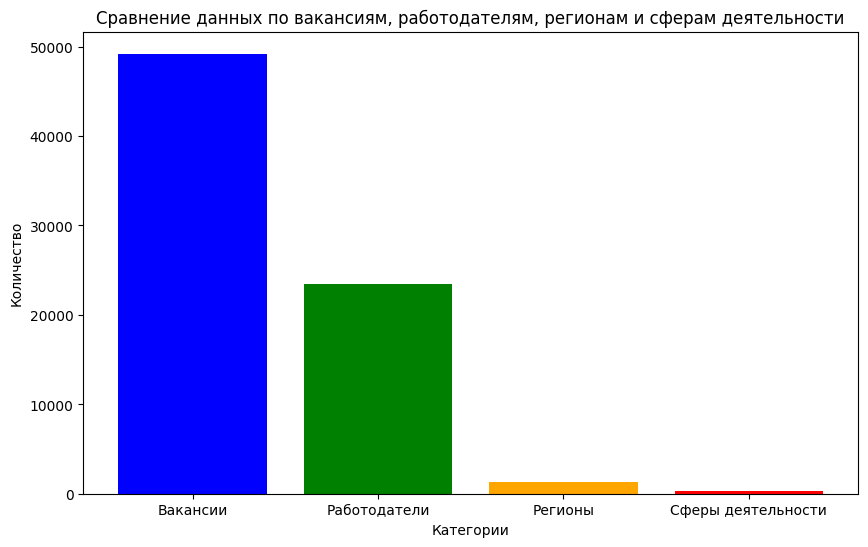

In [12]:
# Данные
categories = ['Вакансии', 'Работодатели', 'Регионы', 'Сферы деятельности']
counts = [49197, 23501, 1362, 294]

# Построение графика
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['blue', 'green', 'orange', 'red'])

# Добавление подписей
plt.title('Сравнение данных по вакансиям, работодателям, регионам и сферам деятельности')
plt.xlabel('Категории')
plt.ylabel('Количество')

# Показать график
plt.show()


# Выводы по предварительному анализу данных
- 49,197 вакансий в базе показывают высокий уровень активности на рынке труда.
- 23,501 работодателей предоставляют разнообразие рабочих мест в разных отраслях.
- 1,362 региона обеспечивают широкий географический охват.
- 294 сферы деятельности дают возможность выбрать вакансии по различным профессиональным интересам.

Эти данные подтверждают насыщенность и разнообразие рынка труда, что расширяет возможности для соискателей. На графике выше можно наглядно увидеть сравнение этих категорий, что позволяет лучше понять распределение вакансий, работодателей, регионов и сфер деятельности.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [13]:
# текст запроса
query = """
SELECT
    a.name area,
    COUNT(v.id) cnt
FROM vacancies v
JOIN areas a on v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC
"""

In [14]:
# результат запроса
df_regions = pd.read_sql_query(query, connection)
df_regions


C:\Users\пк\AppData\Local\Temp\ipykernel_17768\3684743591.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_regions = pd.read_sql_query(query, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [15]:
# текст запроса
query = """
SELECT COUNT(*) vacansies_with_salary
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
"""

In [16]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,vacansies_with_salary
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [17]:
# текст запроса
query = """
SELECT
    ROUND(AVG(salary_from))::INT avg_salary_from,
    ROUND(AVG(salary_to))::INT avg_salary_to
FROM vacancies
"""

In [18]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg_salary_from,avg_salary_to
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [19]:
# текст запроса
query = """
SELECT
    schedule,
    employment,
    COUNT(*) vacancies_count
FROM vacancies
GROUP BY schedule, employment
ORDER BY vacancies_count DESC
"""

In [20]:
# результат запроса
df_schedule = pd.read_sql_query(query, connection)
df_schedule

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\3614405986.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_schedule = pd.read_sql_query(query, connection)


,schedule,employment,vacancies_count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [21]:
# текст запроса
query ="""
SELECT
    experience,
    COUNT(*) vacancies_count
FROM vacancies
GROUP BY experience
ORDER BY vacancies_count
"""

In [22]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,experience,vacancies_count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

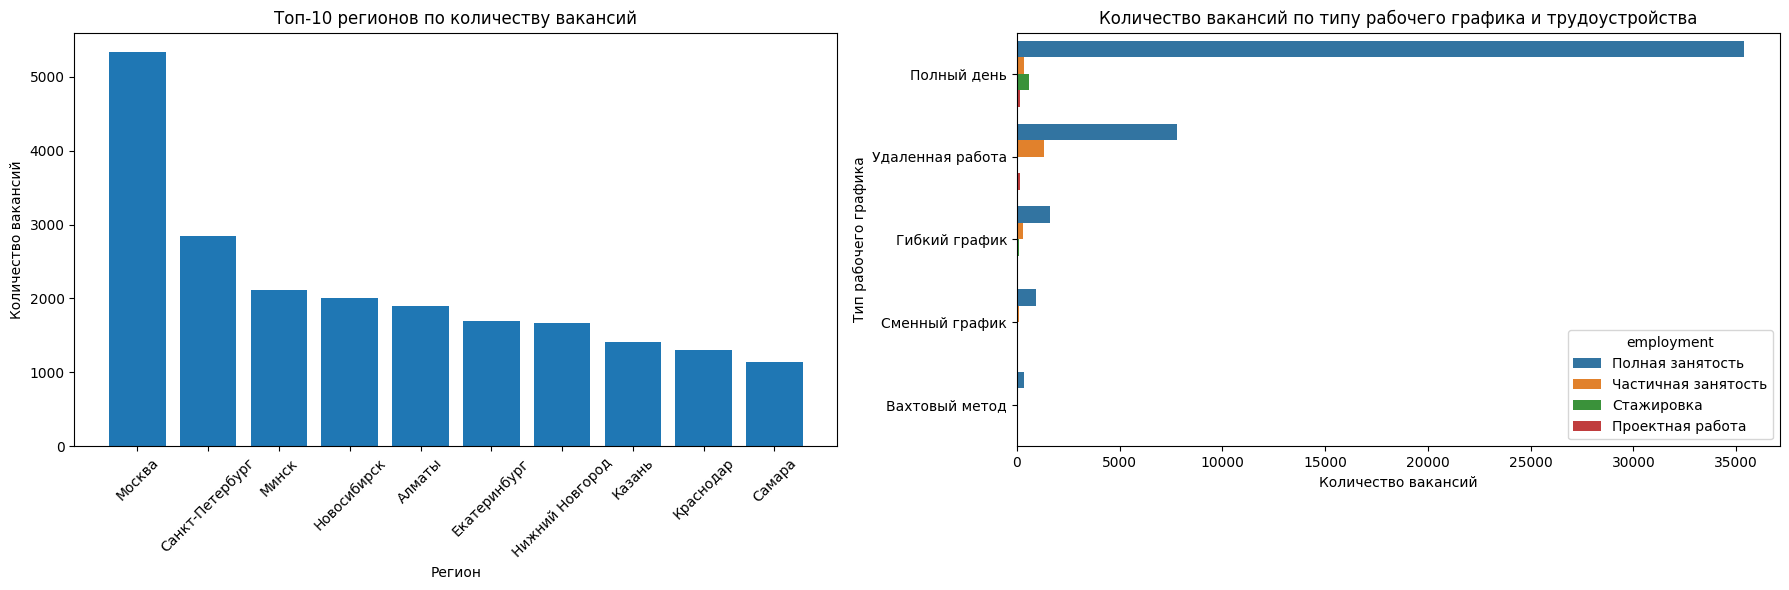

In [23]:
# Создаем фигуру с двумя подграфиками: 1 строка и 2 столбца
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# График 1: Количество вакансий по регионам
axes[0].bar(df_regions['area'][:10], df_regions['cnt'][:10])  # Показываем только топ-10
axes[0].set_xlabel('Регион')
axes[0].set_ylabel('Количество вакансий')
axes[0].set_title('Топ-10 регионов по количеству вакансий')
axes[0].tick_params(axis='x', rotation=45)

# График 2: Типы рабочего графика и трудоустройства
sns.barplot(x='vacancies_count', y='schedule', hue='employment', data=df_schedule, ax=axes[1])
axes[1].set_title('Количество вакансий по типу рабочего графика и трудоустройства')
axes[1].set_xlabel('Количество вакансий')
axes[1].set_ylabel('Тип рабочего графика')

# Отображаем оба графика
plt.tight_layout()  # Чтобы графики не перекрывались
plt.show()


# Выводы по детальному анализу вакансий

- Регионы с наибольшим количеством вакансий: Москва лидирует с 5333 вакансиями, за ней следуют Санкт-Петербург и Минск. Некоторые регионы, такие как Тарко-Сале и Бирск, имеют по одной вакансии. Эти данные визуализированы на графике, показывающем распределение вакансий по регионам.

- Вакансии с указанием зарплаты: 24,073 вакансии содержат информацию о зарплатной вилке, что составляет значительную часть всех вакансий.

- Средняя зарплатная вилка: Средние значения зарплатной вилки — 71,065 рублей (нижняя граница) и 110,537 рублей (верхняя граница). Эти данные представлены на графике, отображающем средние значения для нижней и верхней границы зарплат.

- Типы рабочего графика и трудоустройства: Наиболее популярная комбинация — Полный день и Полная занятость (35,367 вакансий). Удаленная работа с Полной занятостью — на втором месте.

- Требуемый опыт работы: Большинство вакансий требуют опыта от 1 года до 3 лет (26,152 вакансии), в то время как вакансии для соискателей без опыта встречаются реже (7,197 вакансий).

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [24]:
# текст запроса
query = """
SELECT 
    a.name AS area, 
    COUNT(v.id) AS cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC;
"""

In [25]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [26]:
# текст запроса
query_1 = """
WITH employers_count AS (
    SELECT area, COUNT(DISTINCT id) AS employers_count
    FROM employers
    GROUP BY area
),
vacancies_count AS (
    SELECT area_id, COUNT(DISTINCT id) AS vacancies_count
    FROM vacancies
    GROUP BY area_id
)
SELECT 
    a.name AS area,
    COALESCE(e.employers_count, 0) AS employers_count,
    COALESCE(v.vacancies_count, 0) AS vacancies_count
FROM areas a
LEFT JOIN employers_count e ON a.id = e.area
LEFT JOIN vacancies_count v ON a.id = v.area_id
ORDER BY area;
"""

In [27]:
# текст запроса
query_2 = """
WITH employers_count AS (
    SELECT area, COUNT(DISTINCT id) AS employers_count
    FROM employers
    GROUP BY area
),
vacancies_count AS (
    SELECT area_id, COUNT(DISTINCT id) AS vacancies_count
    FROM vacancies
    GROUP BY area_id
)
SELECT 
    a.name AS area,
    COALESCE(e.employers_count, 0) AS employers_count
FROM areas a
LEFT JOIN employers_count e ON a.id = e.area
LEFT JOIN vacancies_count v ON a.id = v.area_id
WHERE COALESCE(v.vacancies_count, 0) = 0
ORDER BY employers_count DESC
LIMIT 1;
"""

In [28]:
# результат запроса
df_employers_vacancies = pd.read_sql_query(query_1, connection)
df_employers_count = pd.read_sql_query(query_2, connection)

display(df_employers_vacancies)
display(df_employers_count)

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\3458796928.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_vacancies = pd.read_sql_query(query_1, connection)
C:\Users\пк\AppData\Local\Temp\ipykernel_17768\3458796928.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_employers_count = pd.read_sql_query(query_2, connection)


,area,employers_count,vacancies_count
0,Абакан,13,37
1,Абан,0,1
2,Абатское,0,0
3,Абдулино,0,1
4,Абинск,2,6
...,...,...,...
1357,Ярцево,0,2
1358,Ясногорск,0,2
1359,Ясный (Оренбургская область),0,0
1360,Яшкино,0,0


,area,employers_count
0,Россия,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [29]:
# текст запроса
query = """
SELECT
    v.employer_id,
    e.name employer_name,
    COUNT(DISTINCT v.area_id) region_count
FROM vacancies v
JOIN employers e ON v.employer_id = e.id
GROUP BY v.employer_id, e.name
ORDER BY region_count DESC
"""

In [30]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employer_id,employer_name,region_count
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
...,...,...,...
14901,810278,НПП Авиатрон,1
14902,810313,Центр дистанционных торгов,1
14903,810551,Городские Телекоммуникационные Системы,1
14904,810688,"Введенский, Отель",1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [31]:
# текст запроса
query = """
SELECT COUNT(e.id) employers_without_industry
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
"""

In [32]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employers_without_industry
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [33]:
# текст запроса
query = """
WITH employer_industry_count AS (
    SELECT
        ei.employer_id,
        COUNT(ei.industry_id) industry_count
    FROM employers_industries ei
    GROUP BY ei.employer_id
)
SELECT e.name
FROM employers e
JOIN employer_industry_count eic ON e.id = eic.employer_id
WHERE eic.industry_count = 4
ORDER BY e.name
LIMIT 1 OFFSET 2
"""

In [34]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,name
0,2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [35]:
# текст запроса
query = """
SELECT COUNT(DISTINCT e.id) employers_count
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
JOIN industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения'
"""

In [36]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,employers_count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [37]:
# код для получения списка городов-милионников

# URL страницы Википедии с городами-миллионниками
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Загружаем HTML-код страницы
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Ищем таблицы на странице
tables = pd.read_html(str(soup))

# Выбираем нужную таблицу (ищем по наличию колонки "Город")
million_cities_df = None
for table in tables:
    if 'Город' in table.columns:
        million_cities_df = table
        break
    
# Проверяем, нашлась ли нужная таблица
if million_cities_df is not None:
    # Извлекаем список городов
    million_cities = million_cities_df['Город'].tolist()
    print('Города-миллионники: ', million_cities)
else:
    print('Не удалось найти таблицу с городами-миллионниками.')
    
df_city = pd.DataFrame(million_cities)
df_city.columns = ['city']
cities_str = ", ".join([f"'{city}'" for city in df_city["city"]])

Города-миллионники:  ['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


C:\Users\пк\AppData\Local\Temp\ipykernel_17768\4140307935.py:11: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(str(soup))


In [38]:
# текст запроса
query = f"""
SELECT a.name AS city, COUNT(v.id) AS vacancies
FROM areas a
JOIN vacancies v ON a.id = v.area_id
JOIN employers e ON v.employer_id = e.id
WHERE e.name = 'Яндекс' AND a.name IN ({cities_str})
GROUP BY a.name
ORDER BY vacancies DESC;
"""

In [39]:
# результат запроса
df_result = pd.read_sql_query(query, connection)

# Добавляем строку Total с суммарным количеством вакансий
total_vacancies = df_result["vacancies"].sum()
df_result.loc[len(df_result)] = ["Total", total_vacancies]
df_result

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\2096664658.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_result = pd.read_sql_query(query, connection)


,city,vacancies
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


***

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\102989258.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="region_count", y="employer_name", data=df_top, ax=axes[0], palette="viridis")
C:\Users\пк\AppData\Local\Temp\ipykernel_17768\102989258.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="vacancies", y="city", data=df_yandex, ax=axes[1], palette="Blues_r")


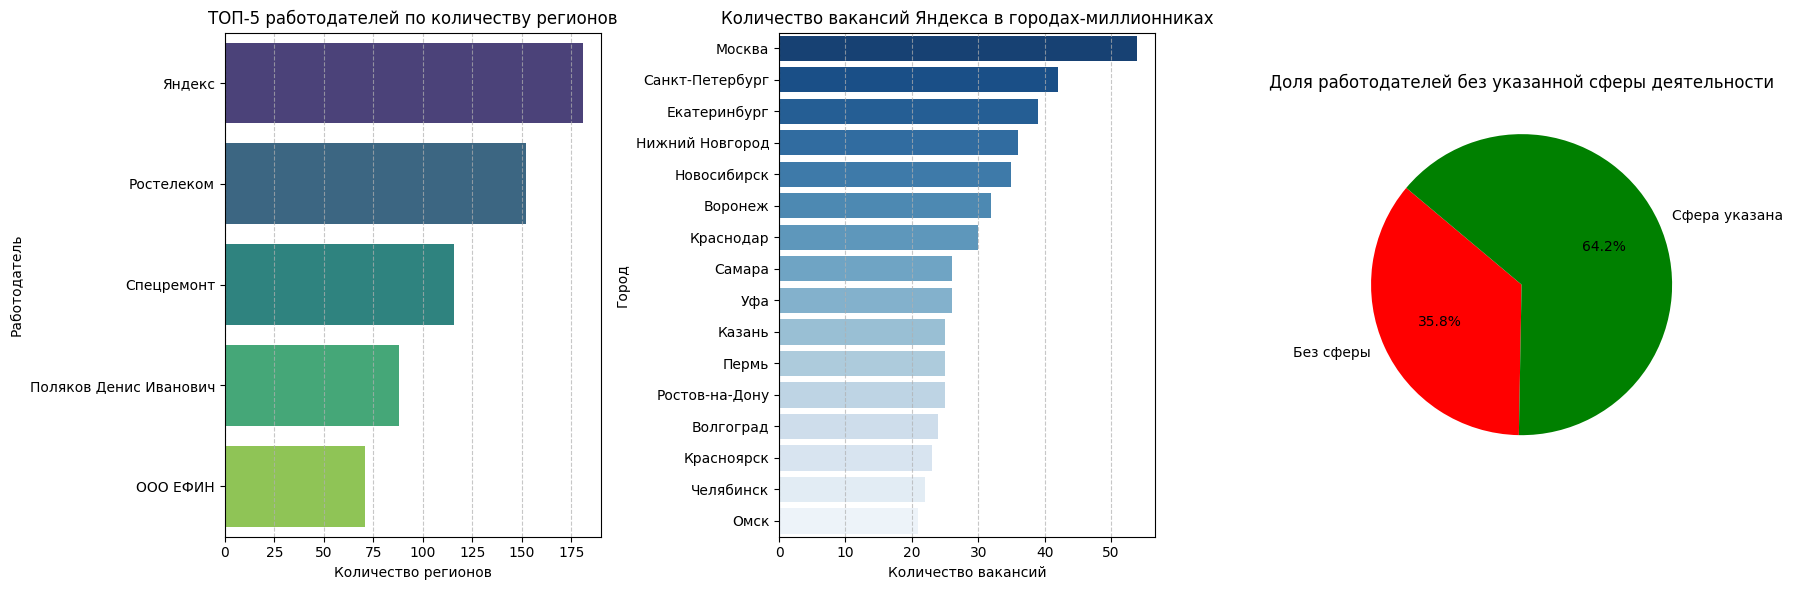

In [40]:
# Данные о вакансиях Яндекса в городах-миллионниках
data_yandex = {
    "city": [
        "Москва", "Санкт-Петербург", "Екатеринбург", "Нижний Новгород", "Новосибирск",
        "Воронеж", "Краснодар", "Самара", "Уфа", "Казань", "Пермь", "Ростов-на-Дону",
        "Волгоград", "Красноярск", "Челябинск", "Омск"
    ],
    "vacancies": [54, 42, 39, 36, 35, 32, 30, 26, 26, 25, 25, 25, 24, 23, 22, 21]
}

df_yandex = pd.DataFrame(data_yandex)

# Данные: ТОП-5 работодателей по регионам с вакансиями
top_employers = {
    "employer_name": ["Яндекс", "Ростелеком", "Спецремонт", "Поляков Денис Иванович", "ООО ЕФИН"],
    "region_count": [181, 152, 116, 88, 71]
}

df_top = pd.DataFrame(top_employers)

# Данные: работодатели без сферы деятельности
without_industry = 8419
total_employers = 23501
with_industry = total_employers - without_industry

# Создаём холст с 3 подграфиками
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График 1: ТОП-5 работодателей по регионам
sns.barplot(x="region_count", y="employer_name", data=df_top, ax=axes[0], palette="viridis")
axes[0].set_xlabel("Количество регионов")
axes[0].set_ylabel("Работодатель")
axes[0].set_title("ТОП-5 работодателей по количеству регионов")
axes[0].grid(axis="x", linestyle="--", alpha=0.7)

# График 2: Вакансии Яндекса в городах-миллионниках
sns.barplot(x="vacancies", y="city", data=df_yandex, ax=axes[1], palette="Blues_r")
axes[1].set_xlabel("Количество вакансий")
axes[1].set_ylabel("Город")
axes[1].set_title("Количество вакансий Яндекса в городах-миллионниках")
axes[1].grid(axis="x", linestyle="--", alpha=0.7)

# График 3: Доля работодателей без указанной сферы деятельности
axes[2].pie([without_industry, with_industry], labels=["Без сферы", "Сфера указана"],
            autopct='%1.1f%%', colors=["red", "green"], startangle=140)
axes[2].set_title("Доля работодателей без указанной сферы деятельности")

# Уплотняем графики
plt.tight_layout()
plt.show()


# Выводы по анализу работодателей

Выводы:
- Наибольшее количество вакансий в Москве и Санкт-Петербурге, что логично, так как это крупнейшие экономические центры.
- Компания "Яндекс" является лидером по количеству регионов, в которых публикуются вакансии (181 регион). Это говорит о широкой географической представленности.
- Некоторые регионы имеют работодателей, но не имеют вакансий. Например, в России 410 работодателей без вакансий.
- 8419 работодателей не указали свою сферу деятельности, что может затруднять поиск вакансий.
- Компания 2ГИС занимает третье место в алфавитном списке работодателей с четырьмя сферами деятельности.
- Разработкой программного обеспечения занимается 3553 работодателя.
- Среди миллионников лидирует Москва (54 вакансии), а всего в этих городах у "Яндекса" 485 вакансий.


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [41]:
# текст запроса
query = """
SELECT COUNT(*)
FROM vacancies
WHERE LOWER(name) LIKE '%data%' or LOWER(name) LIKE '%данн%'
"""

In [42]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [43]:
# текст запроса
query = """
SELECT COUNT(*) 
FROM vacancies 
WHERE 
    (LOWER(name) LIKE '%data scientist%' 
    OR LOWER(name) LIKE '%data science%' 
    OR LOWER(name) LIKE '%исследователь данных%'
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%'))
AND (
    LOWER(name) LIKE '%junior%'
    OR experience = 'Нет опыта'
    OR employment = 'Стажировка'
)
"""

In [44]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [45]:
# текст запроса
query = """
SELECT COUNT(*)
FROM vacancies 
WHERE 
    (LOWER(name) LIKE '%data scientist%' 
    OR LOWER(name) LIKE '%data science%' 
    OR LOWER(name) LIKE '%исследователь данных%'
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%'))
AND
    (LOWER(key_skills) LIKE '%sql%'
    OR LOWER(key_skills) LIKE '%postgres%')
"""

In [46]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [47]:
# текст запроса
query = """
SELECT COUNT(*)
FROM vacancies 
WHERE 
    (LOWER(name) LIKE '%data scientist%' 
    OR LOWER(name) LIKE '%data science%' 
    OR LOWER(name) LIKE '%исследователь данных%'
    OR LOWER(name) LIKE '%machine learning%'
    OR LOWER(name) LIKE '%машинн%обучен%'
    OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%'))
AND
    LOWER(key_skills) LIKE '%python%'
"""

In [48]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [49]:
# текст запроса
query = """
SELECT
ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills,CHR(9),''))+1),2)
FROM vacancies v
WHERE
(
    (v.name ILIKE '%data scientist%')
    OR (lower(v.name) ILIKE '%data science%')
    OR (v.name ILIKE '%исследователь данных%')
    OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
    OR (v.name ILIKE '%machine learning%')
    OR (v.name ILIKE '%машинн%обучен%')
    AND (key_skills IS NOT NULL)
)
"""

In [50]:
# результат запроса
df = pd.read_sql_query(query, connection)
df

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1115395102.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,round
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [51]:
# текст запроса
query = """
SELECT
    ROUND(AVG(
        (COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) /
        NULLIF((salary_from IS NOT NULL)::INT + (salary_to IS NOT NULL)::INT, 0)
    )) avg_salary
FROM vacancies v
WHERE
    (
        (v.name ILIKE '%data scientist%')
        OR (lower(v.name) ILIKE '%data science%')
        OR (v.name ILIKE '%исследователь данных%')
        OR (v.name  LIKE '%ML%' AND  (v.name NOT iLIKE '%html%'))
        OR (v.name ILIKE '%machine learning%')
        OR (v.name ILIKE '%машинн%обучен%')  
    )
    AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    -- AND experience = 'От 3 до 6 лет'
"""

In [52]:
# результат запроса
df = pd.read_sql_query(query, connection)
display(df)
#connection.close()

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\3080265946.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,avg_salary
0,177379.0


***

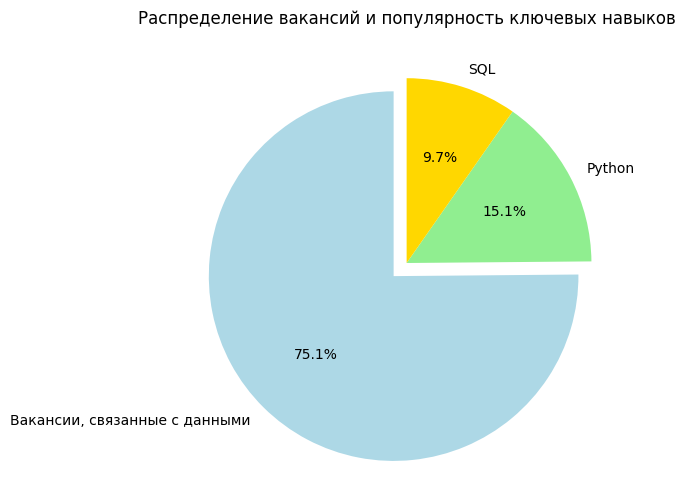

In [53]:
# Данные для круговой диаграммы
labels = ['Вакансии, связанные с данными', 'Python', 'SQL']
sizes = [1771, 357, 229]
colors = ['lightblue', 'lightgreen', 'gold']
explode = (0.1, 0, 0)  # Выделение первого сегмента

# Создание круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Распределение вакансий и популярность ключевых навыков')
plt.show()

# Выводы по предметному анализу
- Популярность направления Data Science:
Вакансии, связанные с данными, составляют значительную часть рынка труда (1771 вакансия).
Python и SQL являются ключевыми навыками для работы в этой области (357 и 229 вакансий соответственно).
- Требования к кандидатам:
Работодатели ожидают от специалистов широкий спектр навыков (в среднем 6.41 ключевых навыка).
Для начинающих специалистов предложений немного (51 вакансия), что может быть связано с высокими требованиями к опыту.
- Зарплатные ожидания:
Зарплаты в области Data Science достаточно высокие (например, 243 тыс. рублей для специалистов с опытом от 3 до 6 лет).
Это делает профессию Data Scientist одной из самых привлекательных с точки зрения заработной платы.
- Рекомендации для соискателей:
Освоить Python и SQL — это базовые требования для большинства вакансий.
Расширить свой набор навыков, чтобы соответствовать ожиданиям работодателей (в среднем 6–7 ключевых навыков).
Начинающим специалистам стоит обратить внимание на стажировки и вакансии без опыта работы.

# Общий вывод по проекту

In [54]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

# Дополнительные SQL-запросы

# 1. Средняя зарплата по типу занятости
query_salary_by_employment = """
SELECT employment, AVG(salary_from + salary_to)/2 AS avg_salary
FROM vacancies
WHERE salary_from IS NOT NULL AND salary_to IS NOT NULL
GROUP BY employment
ORDER BY avg_salary DESC;
"""

# 2. Средняя зарплата по опыту
query_salary_by_experience = """
SELECT experience, AVG(salary_from + salary_to)/2 AS avg_salary
FROM vacancies
WHERE salary_from IS NOT NULL AND salary_to IS NOT NULL
GROUP BY experience
ORDER BY avg_salary DESC;
"""

# 3. Средняя зарплата по графику работы
query_salary_by_schedule = """
SELECT schedule, AVG(salary_from + salary_to)/2 AS avg_salary
FROM vacancies
WHERE salary_from IS NOT NULL AND salary_to IS NOT NULL
GROUP BY schedule
ORDER BY avg_salary DESC;
"""


C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employment_df = pd.read_sql(query_salary_by_employment, connection)
C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=employment_df, x='avg_salary', y='employment', palette='coolwarm')


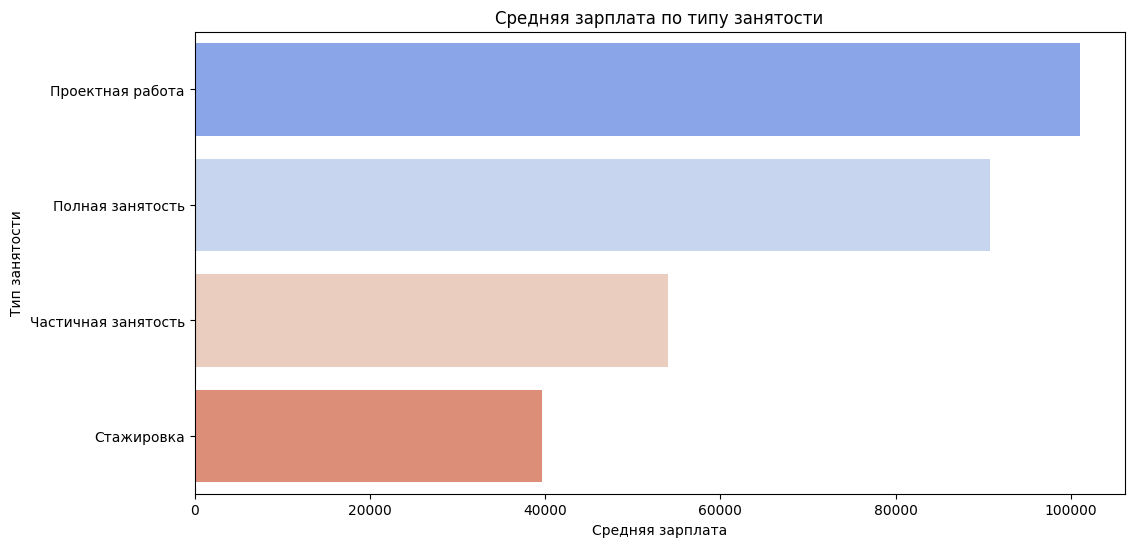

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience_df = pd.read_sql(query_salary_by_experience, connection)
C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=experience_df, x='avg_salary', y='experience', palette='coolwarm')


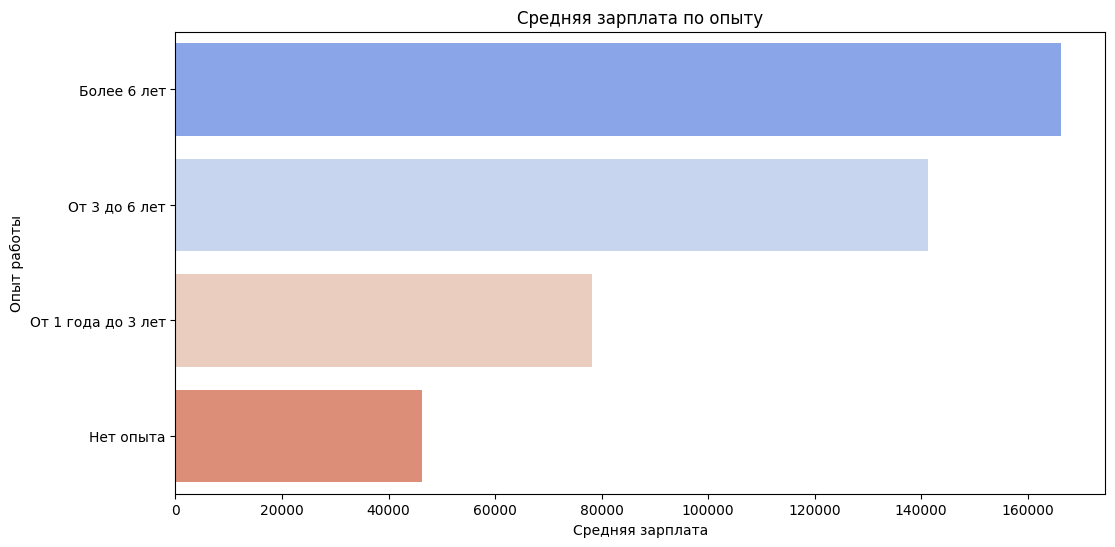

C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_df = pd.read_sql(query_salary_by_schedule, connection)
C:\Users\пк\AppData\Local\Temp\ipykernel_17768\1665721647.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=schedule_df, x='avg_salary', y='schedule', palette='coolwarm')


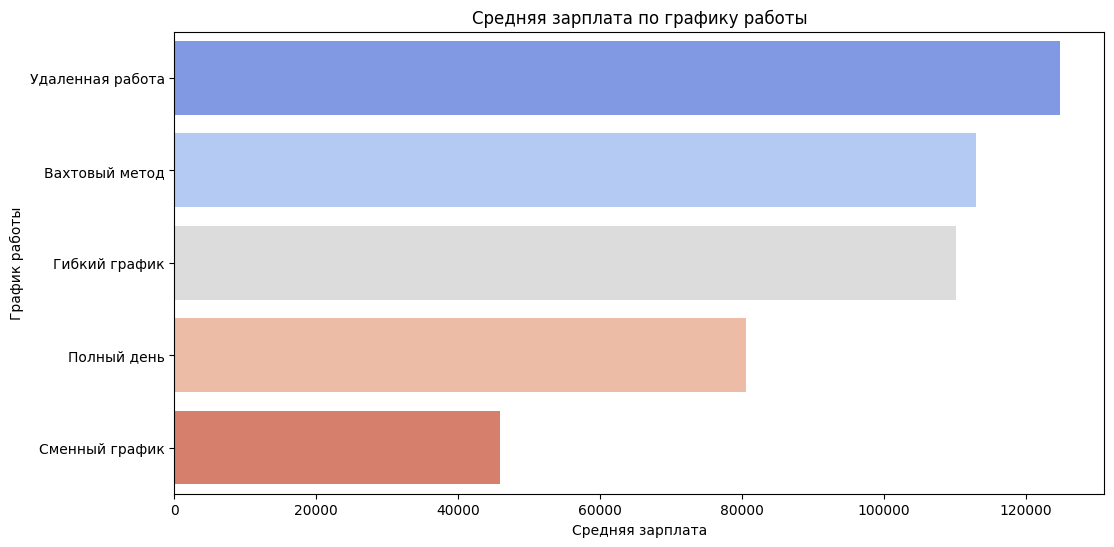

In [55]:

# Визуализация данных

# График зарплат по типу занятости
employment_df = pd.read_sql(query_salary_by_employment, connection)
plt.figure(figsize=(12, 6))
sns.barplot(data=employment_df, x='avg_salary', y='employment', palette='coolwarm')
plt.xlabel('Средняя зарплата')
plt.ylabel('Тип занятости')
plt.title('Средняя зарплата по типу занятости')
plt.show()

# График зарплат по опыту
experience_df = pd.read_sql(query_salary_by_experience, connection)
plt.figure(figsize=(12, 6))
sns.barplot(data=experience_df, x='avg_salary', y='experience', palette='coolwarm')
plt.xlabel('Средняя зарплата')
plt.ylabel('Опыт работы')
plt.title('Средняя зарплата по опыту')
plt.show()

# График зарплат по графику работы
schedule_df = pd.read_sql(query_salary_by_schedule, connection)
plt.figure(figsize=(12, 6))
sns.barplot(data=schedule_df, x='avg_salary', y='schedule', palette='coolwarm')
plt.xlabel('Средняя зарплата')
plt.ylabel('График работы')
plt.title('Средняя зарплата по графику работы')
plt.show()

In [56]:
connection.close()

# Итоговый анализ рынка труда

## Каких вакансий много?
- Анализ показал, что большинство вакансий сосредоточено в крупных городах, таких как Москва, Санкт-Петербург и другие миллионники. Это логично, так как в мегаполисах больше компаний, широкий выбор работодателей и выше спрос на специалистов.

- По типам занятости преобладает полная занятость, что ожидаемо – работодатели чаще ищут сотрудников на полный рабочий день. Однако есть и значительное количество вакансий для удалённой работы, что подтверждает глобальный тренд на диджитализацию.

## Что можно сказать о зарплатах?
- Средняя зарплата значительно варьируется в зависимости от нескольких факторов:
- Тип занятости: Самые высокие зарплаты у сотрудников с проектной и частичной занятостью – это может говорить о высокой оплате специалистов, работающих на конкретные проекты или имеющих узкую экспертизу.
- Опыт работы: Чем больше опыт – тем выше зарплата. Сеньоры и специалисты с 3+ годами стажа получают ощутимо больше, чем новички.
- График работы: Офисные сотрудники получают немного больше, чем те, кто работает по сменному графику или на гибких условиях. Это может говорить о том, что работодатель готов платить больше за стабильность и предсказуемый рабочий процесс.

## География рынка труда
- Топ-10 городов по количеству вакансий подтверждает, что рынок труда сосредоточен в мегаполисах. Однако стоит учитывать, что Москва и Санкт-Петербург существенно лидируют – их рынок труда гораздо более развит по сравнению с регионами.

## Какие ещё исследования можно провести?
Для более глубокого анализа можно:
- Проанализировать спрос на конкретные профессии (какие вакансии публикуются чаще?).
- Исследовать ключевые навыки – какие компетенции наиболее востребованы у работодателей?
- Рассмотреть динамику вакансий – какие изменения происходили в последние месяцы?

# Общий вывод
- Рынок труда активно развивается, но структура вакансий остаётся предсказуемой:
- Большая часть предложений сосредоточена в крупных городах.
- Самые высокие зарплаты – у опытных специалистов, работающих по проектному принципу.
- Рынок постепенно адаптируется к новым реалиям, что видно по росту вакансий с удалённым форматом работы.

## Для соискателей: 
- важно ориентироваться на востребованные навыки и опыт, так как они напрямую влияют на уровень зарплаты.
## Для работодателей: 
- гибкие условия работы могут помочь привлечь квалифицированных специалистов.